In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import researchpy as rp

In [84]:
data = pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [85]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [86]:
data['fuel-type'].replace(to_replace ='gas', value = 0, inplace = True)
data['fuel-type'].replace(to_replace ='diesel', value = 1, inplace = True)
data['drive-wheels'].replace(to_replace ='rwd', value = 1, inplace = True)
data['drive-wheels'].replace(to_replace ='fwd', value = 2, inplace = True)
data['drive-wheels'].replace(to_replace ='4wd', value = 3, inplace = True)
data['aspiration'].replace(to_replace ='std', value = 0, inplace = True)
data['aspiration'].replace(to_replace ='turbo', value = 1, inplace = True)
data['num-of-doors'].replace(to_replace ='two', value = 2, inplace = True)
data['num-of-doors'].replace(to_replace ='four', value = 4, inplace = True)
data['engine-location'].replace(to_replace ='front', value = 1, inplace = True)
data['engine-location'].replace(to_replace ='rear', value = 0, inplace = True)
data['fuel-system'].replace(to_replace ='1bbl', value = 0, inplace = True)
data['fuel-system'].replace(to_replace ='2bbl', value = 1, inplace = True)
data['fuel-system'].replace(to_replace ='4bbl', value = 2, inplace = True)
data['fuel-system'].replace(to_replace ='idi', value = 3, inplace = True)
data['fuel-system'].replace(to_replace ='mfi', value = 4, inplace = True)
data['fuel-system'].replace(to_replace ='mpfi', value = 5, inplace = True)
data['fuel-system'].replace(to_replace ='spdi', value = 6, inplace = True)
data['fuel-system'].replace(to_replace ='spfi', value = 7, inplace = True)
data['body-style'].replace(to_replace ='convertible', value = 0, inplace = True)
data['body-style'].replace(to_replace ='hardtop', value = 1, inplace = True)
data['body-style'].replace(to_replace ='hatchback', value = 2, inplace = True)
data['body-style'].replace(to_replace ='sedan', value = 3, inplace = True)
data['body-style'].replace(to_replace ='wagon', value = 4, inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,0,0,2,0,1,1,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,0,0,2,0,1,1,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,0,0,2,2,1,1,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,0,0,4,3,2,1,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,0,0,4,3,3,1,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


In [87]:
data.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.194311,-0.059866,-0.663595,-0.596135,0.041671,-0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.120592,0.022411,-0.401570,-0.334601,-0.330155,-0.081473,-0.029810,0.051375,...,0.166203,0.297298,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
fuel-type,-0.194311,-0.120592,1.000000,0.401397,0.188496,0.147853,-0.132257,0.040070,0.308346,0.212679,...,0.069594,-0.041529,0.059900,0.243718,0.984356,-0.163773,-0.477314,0.255963,0.191392,0.102733
aspiration,-0.059866,0.022411,0.401397,1.000000,0.052803,0.063028,-0.066465,0.057191,0.257611,0.234539,...,0.108217,0.288086,0.219302,0.225810,0.295541,0.198958,-0.188081,-0.202362,-0.254416,0.182781
num-of-doors,-0.663595,-0.401570,0.188496,0.052803,1.000000,0.685640,0.104877,0.139129,0.439635,0.385675,...,0.013919,-0.006980,0.128059,0.000615,0.171797,-0.122030,-0.240010,-0.014271,-0.037452,0.018002
body-style,-0.596135,-0.334601,0.147853,0.063028,0.685640,1.000000,0.155745,0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.023308,-0.010616,0.136243,-0.119998,-0.102799,0.031697,-0.007170,-0.088995
drive-wheels,0.041671,-0.330155,-0.132257,-0.066465,0.104877,0.155745,1.000000,0.147865,-0.459745,-0.485649,...,-0.524307,-0.424686,-0.456207,-0.063575,-0.127479,-0.445614,0.046880,0.449581,0.452220,-0.566840
engine-location,-0.212471,-0.081473,0.040070,0.057191,0.139129,0.277009,0.147865,1.000000,0.187790,0.050989,...,-0.196826,-0.105971,-0.185730,0.137508,0.019762,-0.283714,-0.195221,0.153487,0.102026,-0.319873
wheel-base,-0.531954,-0.029810,0.308346,0.257611,0.439635,0.401362,-0.459745,0.187790,1.000000,0.874587,...,0.569329,0.384601,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.212679,0.234539,0.385675,0.334433,-0.485649,0.050989,0.874587,1.000000,...,0.683360,0.557810,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818


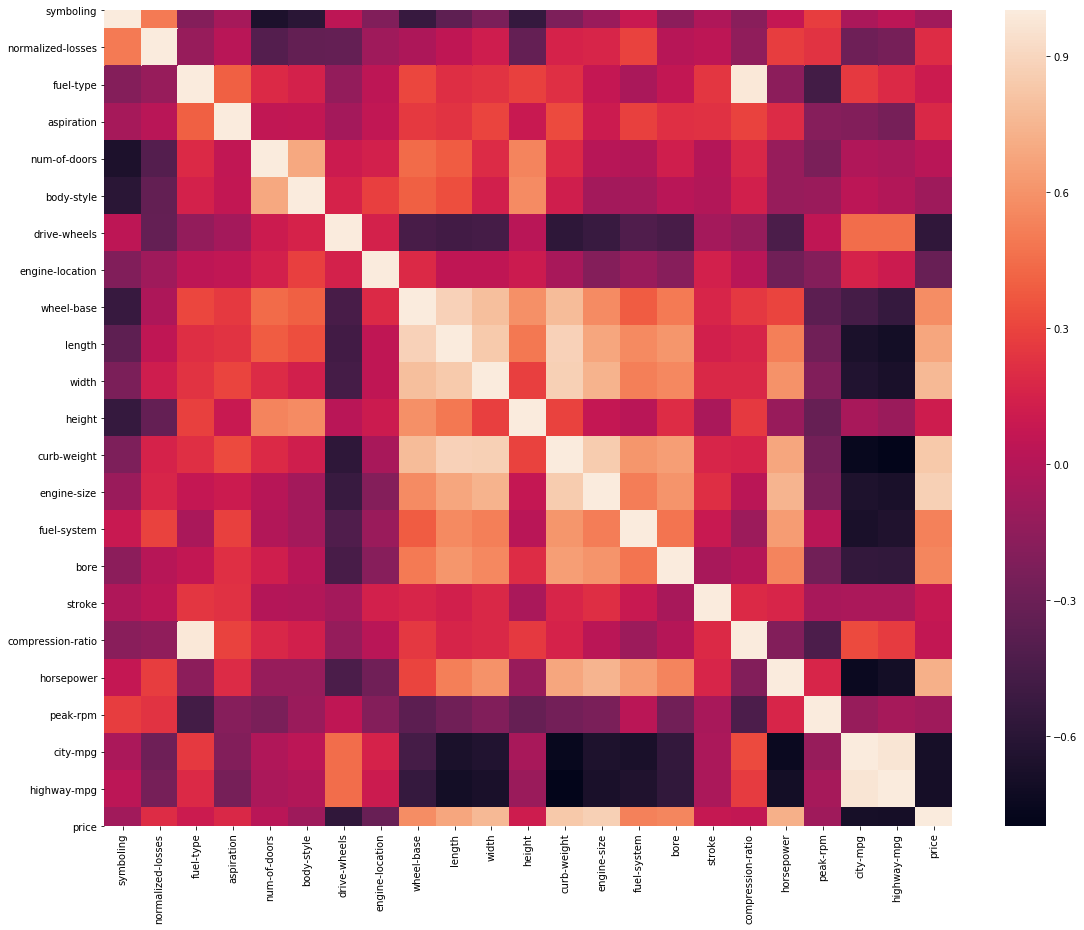

In [88]:
f = plt.figure(figsize=(19, 15))
sns.heatmap(data.corr())

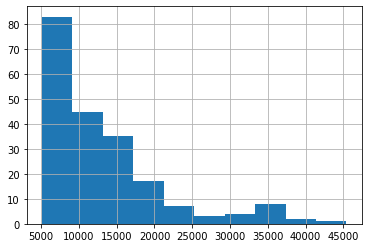

In [67]:
data['price'].hist()

In [69]:
skew(data.price)

1.7534486514523662

In [70]:
kurtosis(data.price)

2.848082544390688

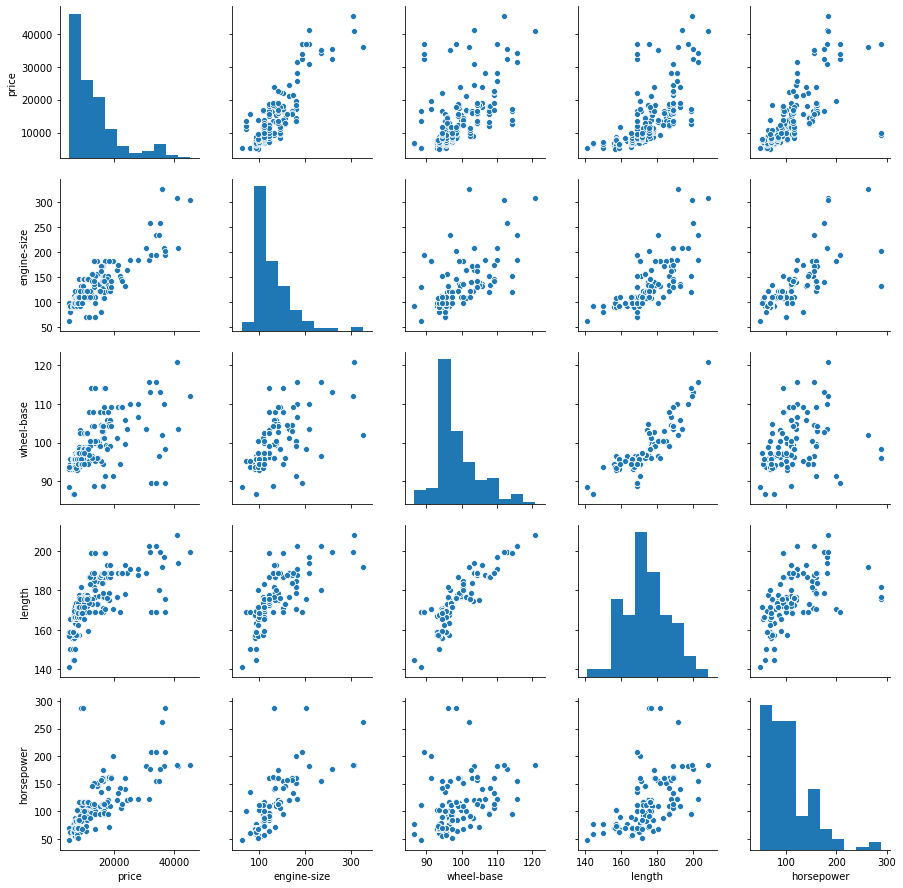

In [73]:
sns_plot = sns.pairplot(
    data[['price', 'engine-size', 'wheel-base', 'length', 'horsepower']])
sns_plot

In [92]:
# проверим, что полноприводные машины имеют цену, отличающуюся от моноприводных
awd = data[data['drive-wheels'] == 3].price
nonawd = data[data['drive-wheels'] != 3].price
descriptives, results = rp.ttest(awd, nonawd)
print(descriptives)
print('_______________________________________')
print(results)

# p value (0,5) более 0,05 говорит, что цены значительно отличаются

   Variable      N          Mean           SD           SE     95% Conf.  \
0     price    9.0  11755.888889  5487.694016  1829.231339   7537.673858   
1     price  196.0  13384.198980  8205.338797   586.095628  12228.298807   
2  combined  205.0  13312.712195  8102.472461   565.901224  12196.946885   

       Interval  
0  15974.103920  
1  14540.099152  
2  14428.477505  
_______________________________________
              Independent t-test    results
0  Difference (price - price) =  -1628.3101
1          Degrees of freedom =    203.0000
2                           t =     -0.5886
3       Two side test p value =      0.5568
4      Difference < 0 p value =      0.2784
5      Difference > 0 p value =      0.7216
6                   Cohen's d =     -0.2006
7                   Hedge's g =     -0.1999
8               Glass's delta =     -0.2967
9                           r =      0.0413


In [94]:
# проверим, что турбированные машины имеют цену, отличающуюся от моноприводных
turbo = data[data['aspiration'] == 1].price
noturbo = data[data['aspiration'] == 0].price
descriptives, results = rp.ttest(turbo, noturbo)
print(descriptives)
print('_______________________________________')
print(results)

# p value (0.0087) менее 0,05 говорит, что цены в целом не отличаются

   Variable      N          Mean           SD           SE     95% Conf.  \
0     price   37.0  16460.756757  6220.632847  1022.665741  14386.694503   
1     price  168.0  12619.392857  8317.110771   641.679027  11352.544591   
2  combined  205.0  13312.712195  8102.472461   565.901224  12196.946885   

       Interval  
0  18534.819010  
1  13886.241124  
2  14428.477505  
_______________________________________
              Independent t-test    results
0  Difference (price - price) =   3841.3639
1          Degrees of freedom =    203.0000
2                           t =      2.6489
3       Two side test p value =      0.0087
4      Difference < 0 p value =      0.9956
5      Difference > 0 p value =      0.0044
6                   Cohen's d =      0.4810
7                   Hedge's g =      0.4793
8               Glass's delta =      0.6175
9                           r =      0.1828
